# Atividade 04
Bianca Bonetti Nunes | 21100451 \
Analise um dado de sua escolha no tempo e no espaço, utilizando as bibliotecas xarray, geopandas, netCDF4. Se preferirem, podem analisar apenas no espaço (no caso de um raster).

## Dados

O dado escolhido foi baixado do site https://disc.gsfc.nasa.gov/datasets/MERRA2_CNN_HAQAST_PM25_1/summary?keywords=air%20quality dos dias 05 e 06 de maio de 2024. 

In [150]:
# Caminhos para a pasta de dados
import os 

# Pasta atual
pastaAtual = os.getcwd()
print(pastaAtual)

# Pasta de dados
pastaDados = r'C:\Users\BiaBN\OneDrive\Documentos\ENS410064\2024\dados'
listaDados = os.listdir(pastaDados)

# Listando arquivos
print(listaDados)

# Selecionando arquivos do MERRA2
prefixed = [filename for filename in os.listdir(pastaDados) if filename.startswith("MERRA2")]
print(prefixed)

C:\Users\BiaBN\OneDrive\Documentos\ENS410064
['1728675725931.csv', 'MERRA2_HAQAST_CNN_L4_V1.20240505.nc4', 'MERRA2_HAQAST_CNN_L4_V1.20240506.nc4', 'metar_FORT_2023.csv', 'metar_SBFL_2022.csv', 'metar_SBFL_2023.csv', 'metar_SBFL_2024.csv']
['MERRA2_HAQAST_CNN_L4_V1.20240505.nc4', 'MERRA2_HAQAST_CNN_L4_V1.20240506.nc4']


In [151]:
#Abrir todos os arquivos da pasta
import xarray as xr

# Abrindo o arquivo .nc4
ds1 = xr.open_dataset(pastaDados+'\\'+prefixed[0])
ds2 = xr.open_dataset(pastaDados+'\\'+prefixed[1])

#concatenando os arquivos
pm25 = xr.concat([ds1, ds2], dim='time')

# Visualizando as informações básicas do arquivo
print(pm25)

<xarray.Dataset> Size: 120MB
Dimensions:                  (time: 48, lat: 361, lon: 576)
Coordinates:
  * time                     (time) datetime64[ns] 384B 2024-05-05T00:30:00 ....
  * lat                      (lat) float32 1kB -90.0 -89.5 -89.0 ... 89.5 90.0
  * lon                      (lon) float32 2kB -180.0 -179.4 ... 178.8 179.4
Data variables:
    MERRA2_CNN_Surface_PM25  (time, lat, lon) float32 40MB 0.8121 0.8118 ... 0.0
    QFLAG                    (time, lat, lon) float64 80MB 1.0 1.0 ... 1.0 1.0
Attributes: (12/33)
    Comment:                           filename: MERRA2_HAQAST_CNN_L4_V1_2024...
    Filename:                          MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Conventions:                       CF-1
    Institution:                       NASA Goddard Space Flight Center
    References:                        http://gmao.gsfc.nasa.gov ; https://do...
    Format:                            NetCDF-4/HDF-5
    ...                                ...
    RangeEndin

In [152]:
print(pm25.dims)
print(pm25.data_vars)

FrozenMappingWarningOnValuesAccess({'time': 48, 'lat': 361, 'lon': 576})
Data variables:
    MERRA2_CNN_Surface_PM25  (time, lat, lon) float32 40MB 0.8121 0.8118 ... 0.0
    QFLAG                    (time, lat, lon) float64 80MB 1.0 1.0 ... 1.0 1.0


In [153]:
media = pm25['MERRA2_CNN_Surface_PM25'].mean(dim=['time','lat','lon'])
mediatime = pm25['MERRA2_CNN_Surface_PM25'].mean(dim='time')
mediatime

<xarray.DataArray 'MERRA2_CNN_Surface_PM25' (lat: 361, lon: 576)> Size: 832kB
array([[0.2507836 , 0.25048572, 0.25017715, ..., 0.25155702, 0.2513164 ,
        0.251049  ],
       [0.19910796, 0.21344726, 0.21318819, ..., 0.21245117, 0.21244107,
        0.21227247],
       [0.10995192, 0.11016466, 0.11026972, ..., 0.10967075, 0.10974368,
        0.10987087],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 2kB -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4

In [154]:
max_mediatime = mediatime.max()
print(max_mediatime)
result = mediatime.where(mediatime == max_mediatime,drop=True)
print(result.coords)
lat = result.coords['lat'].values
lon = result.coords['lon'].values


<xarray.DataArray 'MERRA2_CNN_Surface_PM25' ()> Size: 8B
array(268.35385132)
Coordinates:
  * lat      (lat) float32 4B -72.5
  * lon      (lon) float32 4B -65.62


C:\Users\BiaBN\AppData\Local\Temp\ipykernel_14472\620093048.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(lon, lat, 'ro', markersize=4,color='red', label=f'Valor Máximo ({lat}, {lon})')


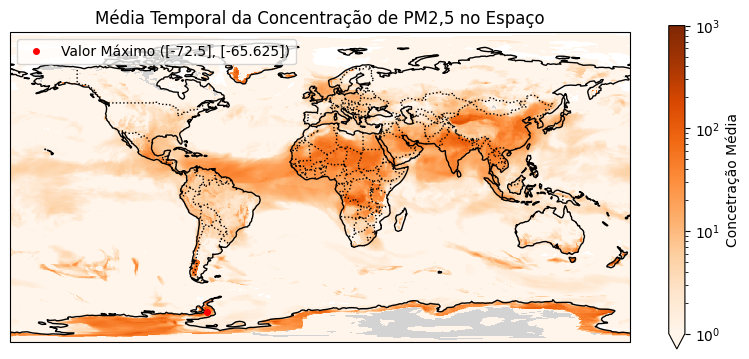

In [155]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs  # Sistema de coordenadas Cartopy
import cartopy.feature as cfeature  # Recursos como costas e fronteiras

# Criar a figura e especificar a projeção
norm = LogNorm(vmin=1, vmax=1000)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plotar os dados

mediatime.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Oranges', norm=norm,cbar_kwargs={'shrink':0.7,'label':'Concetração Média'})
ax.plot(lon, lat, 'ro', markersize=4,color='red', label=f'Valor Máximo ({lat}, {lon})')
ax.legend(loc='upper left')
# Adicionar o mapa-múndi com costas e fronteiras
ax.coastlines()  # Desenhar as linhas costeiras
ax.add_feature(cfeature.BORDERS, linestyle=':')  # Adicionar fronteiras dos países
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Adicionar continentes em cinza claro
plt.title('Média Temporal da Concentração de PM2,5 no Espaço')
plt.show()

In [156]:
#plotar maximos das logitudes
#recortando dados do brasil
# Definir os limites para o Brasil
lat_min, lat_max = -35, 5
lon_min, lon_max = -75, -34

# Recortar os dados para o Brasil usando .sel()
brasil = pm25.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
print(brasil.dims)
print(brasil.data_vars)
print(pm25.lat.min().values, pm25.lat.max().values)
print(pm25.lon.min().values, pm25.lon.max().values)
print(lat_min)
brasil

FrozenMappingWarningOnValuesAccess({'time': 48, 'lat': 81, 'lon': 66})
Data variables:
    MERRA2_CNN_Surface_PM25  (time, lat, lon) float32 1MB 0.0 0.0 ... 17.63
    QFLAG                    (time, lat, lon) float64 2MB 2.0 2.0 ... 2.0 2.0
-90.0 90.0
-180.0 179.375
-35


<xarray.Dataset> Size: 3MB
Dimensions:                  (time: 48, lat: 81, lon: 66)
Coordinates:
  * time                     (time) datetime64[ns] 384B 2024-05-05T00:30:00 ....
  * lat                      (lat) float32 324B -35.0 -34.5 -34.0 ... 4.5 5.0
  * lon                      (lon) float32 264B -75.0 -74.38 ... -35.0 -34.38
Data variables:
    MERRA2_CNN_Surface_PM25  (time, lat, lon) float32 1MB 0.0 0.0 ... 17.63
    QFLAG                    (time, lat, lon) float64 2MB 2.0 2.0 ... 2.0 2.0
Attributes: (12/33)
    Comment:                           filename: MERRA2_HAQAST_CNN_L4_V1_2024...
    Filename:                          MERRA2_HAQAST_CNN_L4_V1_20240505.nc4
    Conventions:                       CF-1
    Institution:                       NASA Goddard Space Flight Center
    References:                        http://gmao.gsfc.nasa.gov ; https://do...
    Format:                            NetCDF-4/HDF-5
    ...                                ...
    RangeEndingDate:                   2024-05-05
    RangeEndingTime:                   23:59:59.000000
    DODS_EXTRA.Unlimited_Dimension:    time
    history:                           2023-04-21 04:24:38 GMT Hyrax-1.16.3 h...
    ProcessingLevel:                   4
    MapProjection:                     Geographic lat/lon. Datum: WGS-84

<xarray.DataArray 'MERRA2_CNN_Surface_PM25' (lat: 81, lon: 66)> Size: 21kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 324B -35.0 -34.5 -34.0 -33.5 ... 3.5 4.0 4.5 5.0
  * lon      (lon) float32 264B -75.0 -74.38 -73.75 ... -35.62 -35.0 -34.38


array([ 5,  6,  7,  7,  7,  7,  5,  6,  6,  6,  6,  6,  6, 39, 39,  7, 38,
       37, 38, 38, 40, 45, 45,  8,  8, 49, 49, 49, 18, 19, 19, 19, 50, 50,
       18, 17, 51, 51, 42, 52, 52, 11, 44, 53, 53, 47,  3, 52,  1,  1,  1,
       20, 18, 18, 18, 13, 12, 12, 22, 22, 22, 65, 18, 17, 17, 62, 14, 63,
       63, 63, 63, 65, 65, 64, 58, 60, 60, 46, 48, 22, 21])

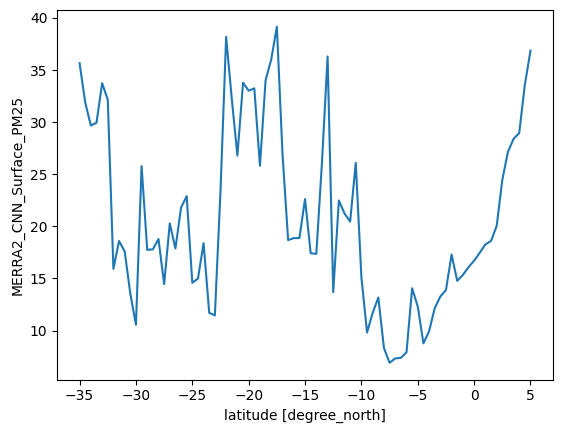

In [187]:
max_mediatimebrasil = mediatimebrasil.max(dim='lon')

max_mediatimebrasil.plot()

import numpy as np
resultbra = mediatimebrasil.where(mediatimebrasil == max_mediatimebrasil)
print(resultbra)
resultado = np.array([np.where(~np.isnan(row))[0][0] for row in resultbra])
resultado


In [188]:
resultado2 = -75+0.625*resultado

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_14472\2240946370.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(resultado2, mediatimebrasil.lat, 'ro',markersize=4,color='red', label=f'Valor Máximo ({lat}, {lon})')


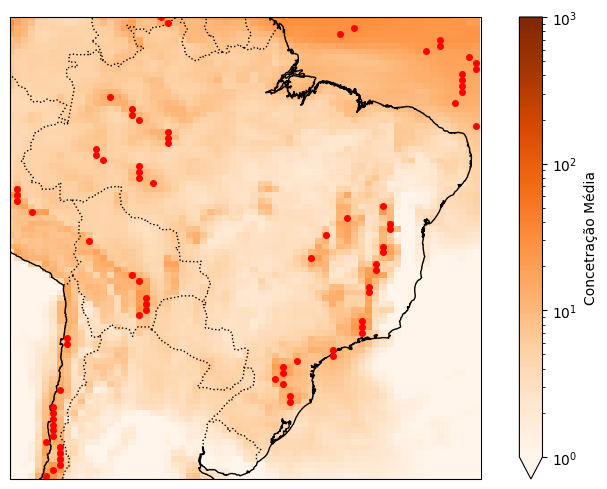

In [192]:
mediatimebrasil = brasil['MERRA2_CNN_Surface_PM25'].mean(dim='time')

norm = LogNorm(vmin=1, vmax=1000)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plotar os dados

mediatimebrasil.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Oranges', norm=norm,cbar_kwargs={'shrink':1,'label':'Concetração Média'})
ax.plot(resultado2, mediatimebrasil.lat, 'ro',markersize=4,color='red', label=f'Valor Máximo ({lat}, {lon})')

# Adicionar o mapa-múndi com costas e fronteiras
# Adicionar contornos geográficos
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Definir a extensão do mapa para o Brasil
ax.set_extent([lon_min, lon_max, lat_min+1.5, lat_max])
plt.show()

In [235]:
import geopandas as gpd
import xarray as xr
import rasterio
from rasterio.mask import mask
shapefile = gpd.read_file(r'C:\Users\BiaBN\OneDrive\Documentos\ENS410064\Dados\BR_Pais_2022\BR_Pais_2022.shp')
pm25.rio.write_crs("EPSG:4326", inplace=True)
for geom in shapefile_brasil.geometry:
    try:
        pm25_recortado = pm25.clip(geom)
        break  # Se der certo, parar o loop
    except NotImplementedError:
        continue

# Visualizar o resultado
#pm25_recortado['MERRA2_CNN_Surface_PM25'].plot()


In [236]:
from shapely.geometry import Point  # Importando Point corretamente

lon = pm25['lon'].values
lat = pm25['lat'].values

shapefile = shapefile.to_crs("EPSG:4326")

# Criar um grid de coordenadas
coords = np.meshgrid(lon, lat)
points = np.vstack([coords[0].ravel(), coords[1].ravel()]).T

# Passo 4: Verificar se os pontos estão dentro do Brasil
mask = shapefile.contains(gpd.GeoSeries([Point(x, y) for x, y in points], crs="EPSG:4326"))

# Passo 5: Reshape a máscara para o formato do seu dataset
mask = mask.reshape(lon.shape[0], lat.shape[0])

# Passo 6: Aplicar a máscara no xarray.Dataset
ds_masked = ds.where(mask, np.nan)

# Agora, o ds_masked terá valores NaN fora do Brasil
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
# Visualizar o resultado ou salvar
ds_masked['MERRA2_CNN_Surface_PM25'].mean(dim='time').plot()
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Definir a extensão do mapa para o Brasil
ax.set_extent([minx, maxx, miny+2, maxy])

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_14472\3563020103.py:13: UserWarning: The indices of the left and right GeoSeries' are not equal, and therefore they will be aligned (reordering and/or introducing missing values) before executing the operation. If this alignment is the desired behaviour, you can silence this warning by passing 'align=True'. If you don't want alignment and protect yourself of accidentally aligning, you can pass 'align=False'.
  mask = shapefile.contains(gpd.GeoSeries([Point(x, y) for x, y in points], crs="EPSG:4326"))


AttributeError: 'Series' object has no attribute 'reshape'

In [223]:
type(pm25)

xarray.core.dataset.Dataset